In [1]:
# --- MUST be the very first cell, before importing numpy/sklearn ---
import os

# cap thread pools (pick a sensible number for your CPU, e.g., 7 or 8)
os.environ["LOKY_MAX_CPU_COUNT"] = "8"
os.environ["OMP_NUM_THREADS"]     = "7"
os.environ["MKL_NUM_THREADS"]     = "7"
os.environ["OPENBLAS_NUM_THREADS"]= "7"
os.environ["NUMEXPR_NUM_THREADS"] = "7"


In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "5"


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [4]:
df=pd.read_csv('cod.csv')
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


# Display Dataset Information

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wins,1558.0,153.002567,3.019848e+02,0.0,0.000000,10.000000,168.000000,3519.0
kills,1558.0,3753.001926,7.929697e+03,0.0,4.000000,191.500000,3445.750000,66935.0
kdRatio,1558.0,0.637098,4.304593e-01,0.0,0.261442,0.732837,0.955293,3.0
killstreak,1558.0,6.895379,1.018468e+01,0.0,0.000000,5.000000,12.000000,235.0
level,1558.0,44.414634,6.831806e+01,1.0,1.000000,11.000000,51.000000,435.0
losses,1558.0,4.998074,7.005778e+00,0.0,0.000000,2.000000,8.000000,80.0
prestige,1558.0,47.657253,5.162621e+01,0.0,0.000000,14.000000,110.000000,117.0
hits,1558.0,10330.189987,2.295410e+04,0.0,0.000000,214.500000,9015.500000,209851.0
timePlayed,1558.0,425.915918,7.861825e+02,0.0,4.000000,51.000000,485.500000,7479.0
headshots,1558.0,630.672657,1.305150e+03,0.0,1.000000,32.000000,602.750000,11719.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [7]:
df.shape

(1558, 19)

# Data Preparation

## Checking for Null values

In [8]:
df.isnull().sum()

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

## checking for Duplicate values

In [9]:
df.duplicated().sum()
print("number of duplicated data is :",df.duplicated().sum())

number of duplicated data is : 0


## checking for Non Numeric Columns

In [10]:
num_non_numeric = df.select_dtypes(exclude=["number"]).shape[1]
print(f"No of non numeric columns: {num_non_numeric}")

No of non numeric columns: 1


In [11]:
non_numeric_cols = df.select_dtypes(exclude=["number"]).columns.tolist()
print(f"List of non numeric columns: {non_numeric_cols}")

List of non numeric columns: ['name']


# Data Visualization

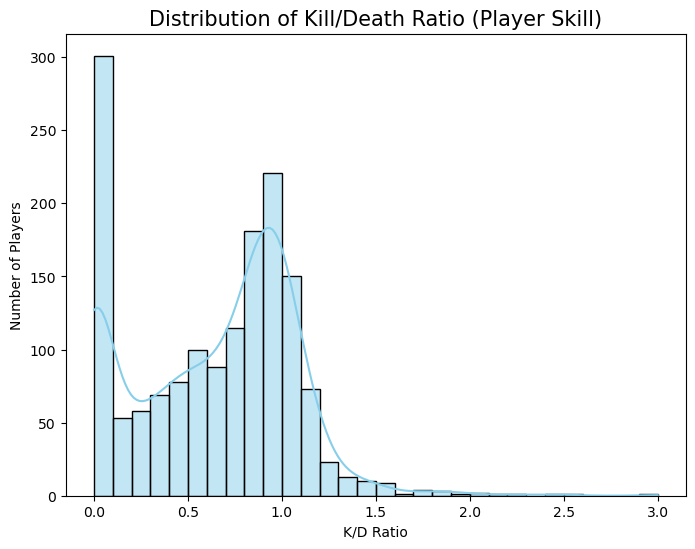

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df['kdRatio'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Kill/Death Ratio (Player Skill)", fontsize=15)
plt.xlabel("K/D Ratio")
plt.ylabel("Number of Players")
plt.show()


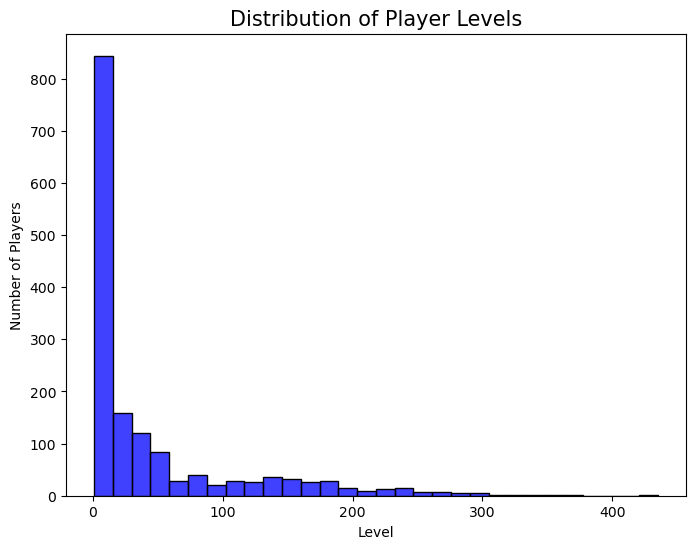

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(df['level'], bins=30,  color='blue')
plt.title("Distribution of Player Levels", fontsize=15)
plt.xlabel("Level")
plt.ylabel("Number of Players")
plt.show()


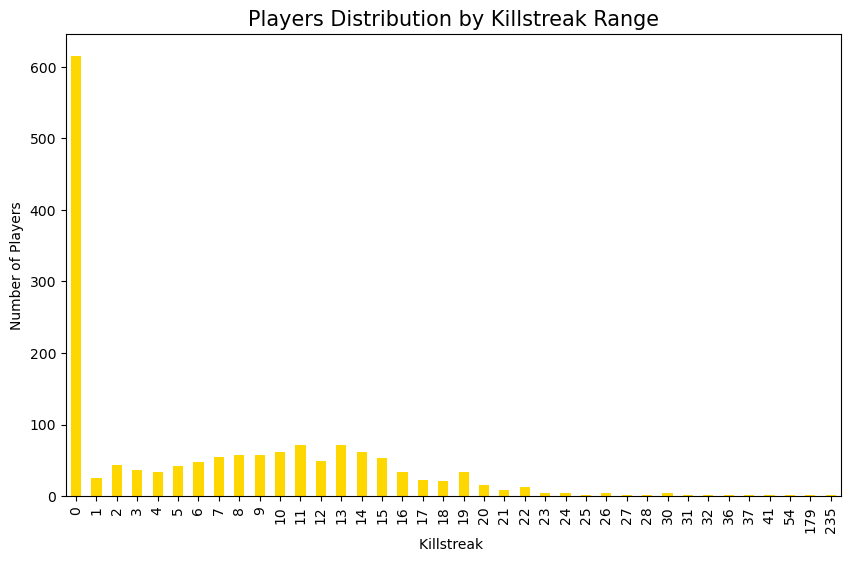

In [14]:
ks_counts = df['killstreak'].value_counts().sort_index()

plt.figure(figsize=(10,6))
ks_counts.plot(kind='bar', color='gold')

plt.title("Players Distribution by Killstreak Range", fontsize=15)
plt.xlabel("Killstreak ")
plt.ylabel("Number of Players")
plt.show()


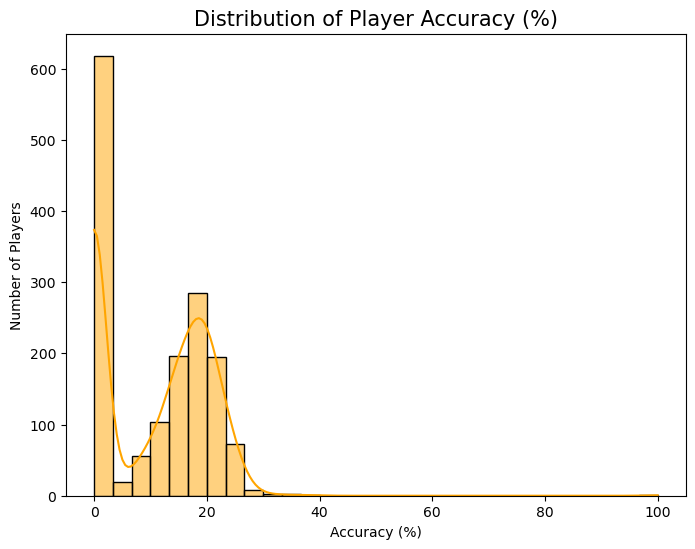

In [15]:
df['accuracy'] = (df['hits'] / (df['shots'] + 1e-5)) * 100

plt.figure(figsize=(8,6))
sns.histplot(df['accuracy'], bins=30, kde=True, color='orange')
plt.title("Distribution of Player Accuracy (%)", fontsize=15)
plt.xlabel("Accuracy (%)")
plt.ylabel("Number of Players")
plt.show()

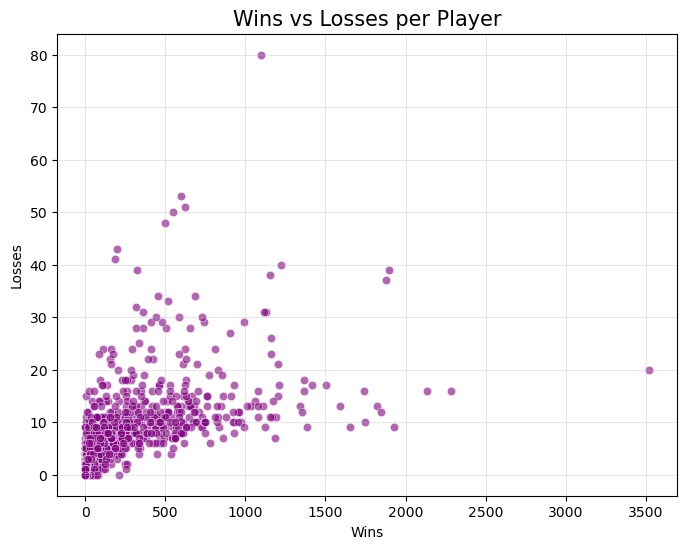

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='wins', y='losses',alpha=0.6,  color='purple')
plt.title("Wins vs Losses per Player", fontsize=15)
plt.xlabel("Wins")
plt.ylabel("Losses")
plt.grid(alpha=0.3)
plt.show()


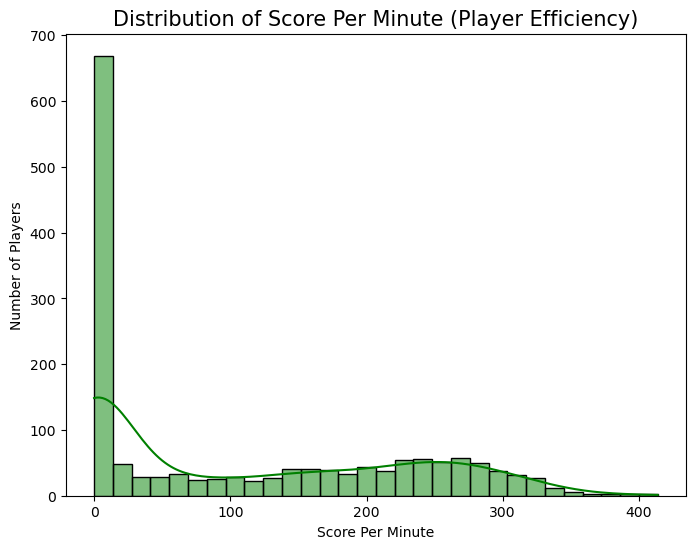

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df['scorePerMinute'], bins=30, kde=True, color='green')
plt.title("Distribution of Score Per Minute (Player Efficiency)", fontsize=15)
plt.xlabel("Score Per Minute")
plt.ylabel("Number of Players")
plt.show()


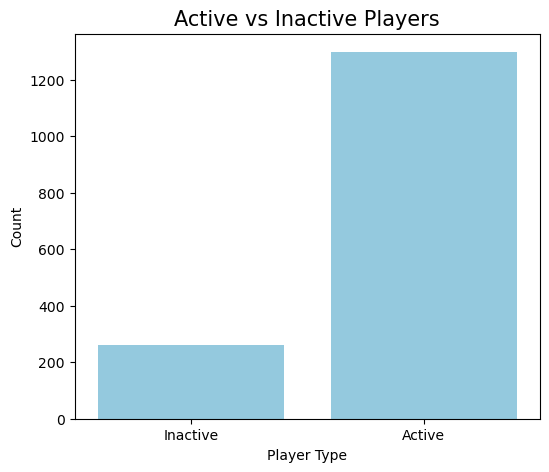

In [18]:
df['activity_status'] = np.where((df['kills'] > 0) | (df['wins'] > 0), 'Active', 'Inactive')

plt.figure(figsize=(6,5))
sns.countplot(data=df, x='activity_status',  color='skyblue')
plt.title("Active vs Inactive Players", fontsize=15)
plt.xlabel("Player Type")
plt.ylabel("Count")
plt.show()


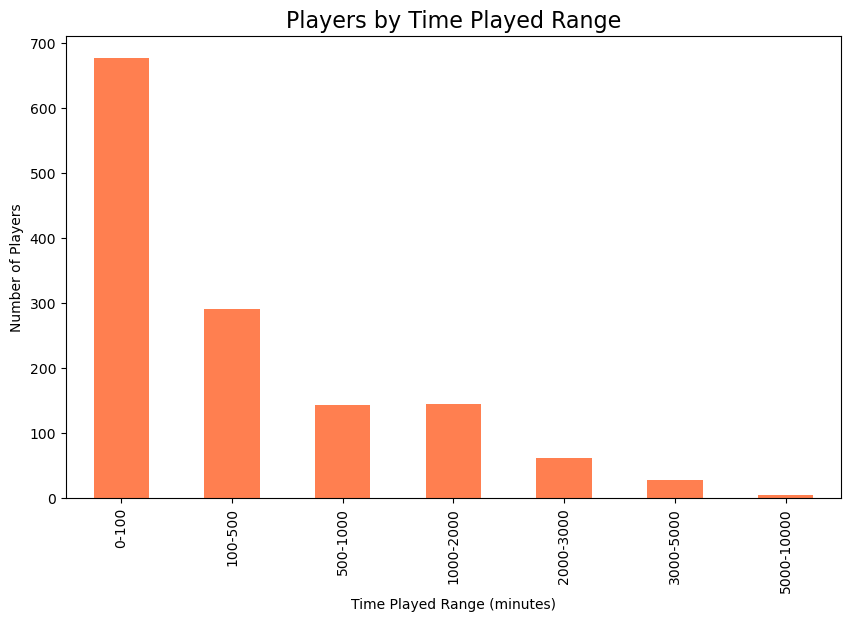

In [19]:
df['time_range'] = pd.cut(
    df['timePlayed'],
    bins=[0,100,500,1000,2000,3000,5000,10000],
    labels=['0-100','100-500','500-1000','1000-2000','2000-3000','3000-5000','5000-10000']
)
range_counts = df['time_range'].value_counts().sort_index()

plt.figure(figsize=(10,6))
ax = range_counts.plot(kind='bar', color='coral')

plt.title("Players by Time Played Range", fontsize=16)
plt.xlabel("Time Played Range (minutes)")
plt.ylabel("Number of Players")

plt.show()

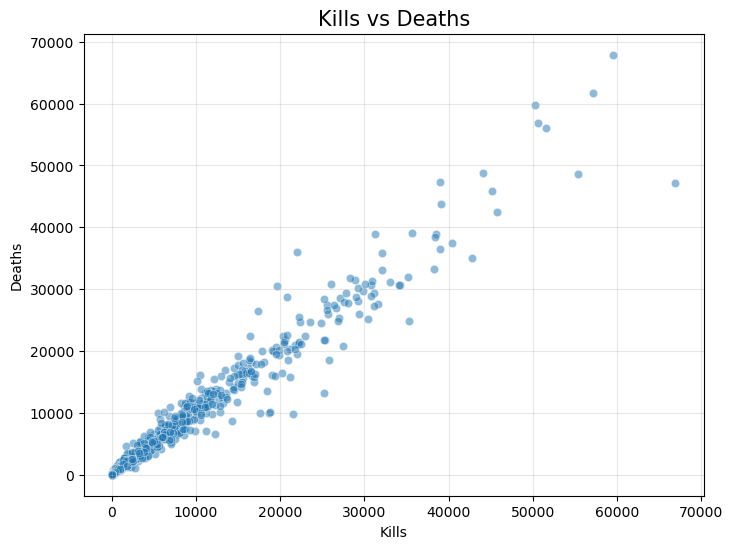

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='kills', y='deaths', alpha=0.5)
plt.title("Kills vs Deaths", fontsize=15)
plt.xlabel("Kills")
plt.ylabel("Deaths")
plt.grid(alpha=0.3)
plt.show()


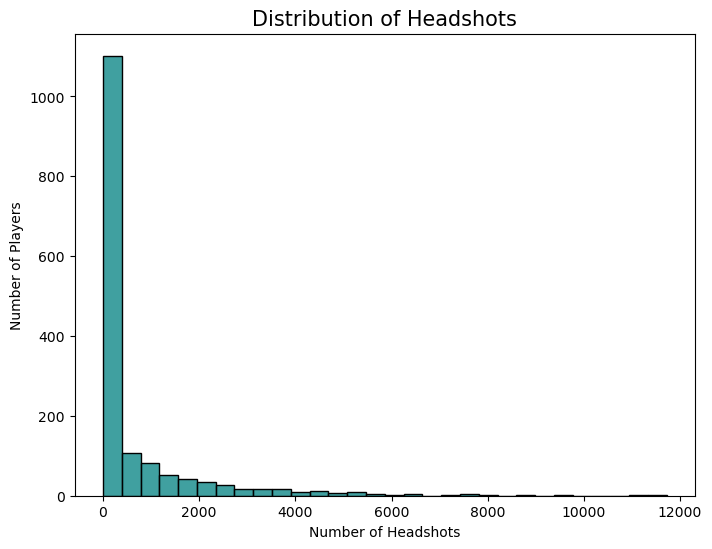

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['headshots'], bins=30,  color='teal')
plt.title("Distribution of Headshots", fontsize=15)
plt.xlabel("Number of Headshots")
plt.ylabel("Number of Players")
plt.show()


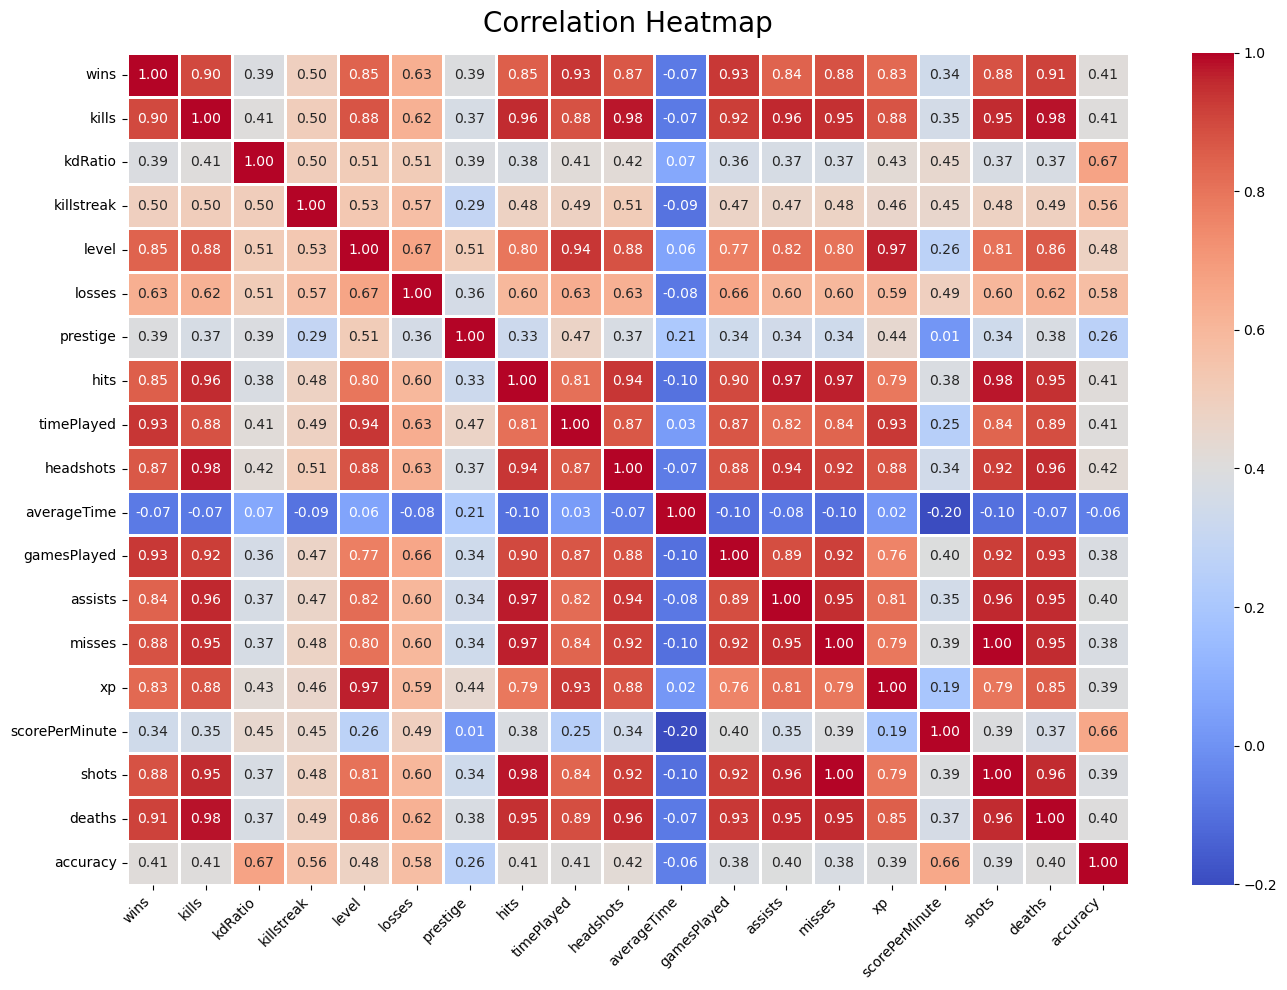

In [22]:
num_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(14,10))

corr = num_df.corr()

sns.heatmap(
    corr,
    annot=True,             
    fmt=".2f",              
    cmap='coolwarm',        
    linewidths=1,                 
    cbar=True              
)

plt.title("Correlation Heatmap", fontsize=20, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [23]:
# =========================
# STEP 1: Feature engineering + feature lists
# =========================

df_model = df.copy()

# 1.2 Create accuracy feature (hits / shots), avoid division by zero
df_model["accuracy"] = df_model["hits"] / df_model["shots"].replace(0, np.nan)
df_model["accuracy"] = df_model["accuracy"].fillna(0.0)

print("\nAfter adding accuracy:")
print("df_model shape:", df_model.shape)      # should be (1558, 20)
print("df_model columns:", list(df_model.columns))

# 1.3 Features used to DEFINE clusters (skill-focused)
cluster_features = [
    "kdRatio",
    "scorePerMinute",
    "accuracy",
    "wins",
    "losses",
]

# 1.4 Features used to TRAIN MODELS (richer set: skill + engagement)
model_features = [
    "kdRatio",
    "scorePerMinute",
    "accuracy",
    "wins",
    "losses",
    "timePlayed",
    "gamesPlayed",
    "xp",
    "level",
    "prestige",
    "headshots",
    "assists",
    "shots",
    "deaths",
]

print("\ncluster_features:", cluster_features)
print("model_features:", model_features)


After adding accuracy:
df_model shape: (1558, 22)
df_model columns: ['name', 'wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'misses', 'xp', 'scorePerMinute', 'shots', 'deaths', 'accuracy', 'activity_status', 'time_range']

cluster_features: ['kdRatio', 'scorePerMinute', 'accuracy', 'wins', 'losses']
model_features: ['kdRatio', 'scorePerMinute', 'accuracy', 'wins', 'losses', 'timePlayed', 'gamesPlayed', 'xp', 'level', 'prestige', 'headshots', 'assists', 'shots', 'deaths']


In [24]:
# =========================
# STEP 2: Train/test split
# =========================

from sklearn.model_selection import train_test_split

# 2.1 Split row indices into train and test
idx_train, idx_test = train_test_split(
    df_model.index,
    test_size=0.30,      # 30% test, 70% train
    random_state=42,
    shuffle=True
)

# 2.2 Create train/test DataFrames
df_train = df_model.loc[idx_train].copy()
df_test  = df_model.loc[idx_test].copy()

# 2.3 Feature matrices for KMeans (cluster_features)
X_train_cluster = df_train[cluster_features].copy()
X_test_cluster  = df_test[cluster_features].copy()

# 2.4 Feature matrices for RF / Logistic (model_features)
X_train_model = df_train[model_features].copy()
X_test_model  = df_test[model_features].copy()

print("X_train_cluster shape:", X_train_cluster.shape)
print("X_test_cluster shape :", X_test_cluster.shape)
print("X_train_model shape  :", X_train_model.shape)
print("X_test_model shape   :", X_test_model.shape)

X_train_cluster shape: (1090, 5)
X_test_cluster shape : (468, 5)
X_train_model shape  : (1090, 14)
X_test_model shape   : (468, 14)


In [25]:
# =========================
# STEP 3: KMeans clustering + group labels
# =========================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 3.1 Scale the cluster_features (fit ONLY on train)
scaler_cluster = StandardScaler()
Z_train = scaler_cluster.fit_transform(X_train_cluster)
Z_test  = scaler_cluster.transform(X_test_cluster)

# 3.2 Fit KMeans on TRAIN data only
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10   # safer across sklearn versions
)

train_clusters = kmeans.fit_predict(Z_train)
test_clusters  = kmeans.predict(Z_test)

# 3.3 Look at cluster profiles to understand which is which
df_train_clusters = df_train.copy()
df_train_clusters["cluster"] = train_clusters

cluster_profile = df_train_clusters.groupby("cluster")[cluster_features].mean()
print("Cluster profile (means of key features):")
print(cluster_profile)



# 3.4 Map each cluster ID to a human-readable group
cluster_to_group = {
    0: "Struggling",
    1: "Balanced",
    2: "Overperforming"
}

# 3.5 Create y_train / y_test labels
y_train = pd.Series(train_clusters, index=df_train.index).map(cluster_to_group)
y_test  = pd.Series(test_clusters,  index=df_test.index).map(cluster_to_group)

print("\nTrain group counts:")
print(y_train.value_counts())
print("\nTest group counts:")
print(y_test.value_counts())


Cluster profile (means of key features):
          kdRatio  scorePerMinute  accuracy        wins     losses
cluster                                                           
0        0.306362        7.850001  0.010137    2.318280   0.344086
1        0.862465      177.767336  0.176790  127.407950   5.968619
2        1.016318      203.258261  0.192055  756.816327  17.578231

Train group counts:
Balanced          478
Struggling        465
Overperforming    147
Name: count, dtype: int64

Test group counts:
Struggling        212
Balanced          201
Overperforming     55
Name: count, dtype: int64


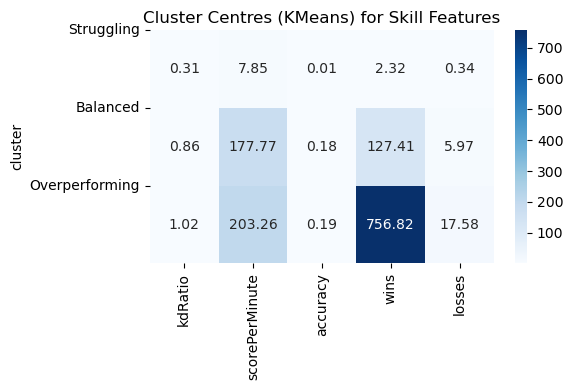

In [26]:
# --- 3A: Heatmap of cluster centres (means) ---
plt.figure(figsize=(6, 4))
sns.heatmap(
    cluster_profile,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)

# Replace y-axis labels with 'Struggling', 'Balanced', 'Overperforming'
plt.yticks(ticks=[0, 1, 2], labels=["Struggling", "Balanced", "Overperforming"], rotation=0)

plt.title("Cluster Centres (KMeans) for Skill Features")
plt.tight_layout()
plt.show()


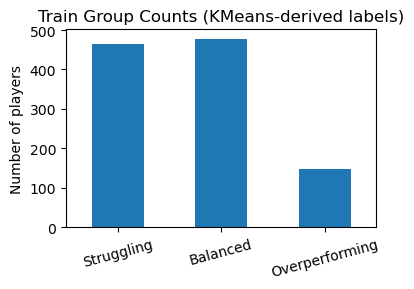

In [27]:
# --- 3B: Bar plot of group sizes (train) ---
plt.figure(figsize=(4, 3))
y_train.value_counts().loc[["Struggling","Balanced","Overperforming"]].plot(kind="bar")
plt.title("Train Group Counts (KMeans-derived labels)")
plt.ylabel("Number of players")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

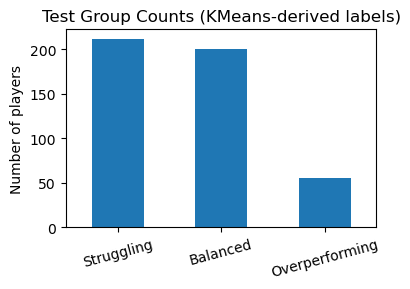

In [28]:
# --- 3C: Bar plot of group sizes (test) ---
plt.figure(figsize=(4, 3))
y_test.value_counts().loc[["Struggling","Balanced","Overperforming"]].plot(kind="bar")
plt.title("Test Group Counts (KMeans-derived labels)")
plt.ylabel("Number of players")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [29]:
# =========================
# STEP 4: Logistic Regression on KMeans groups
# =========================

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

logreg_pipe.fit(X_train_model, y_train)
y_pred_lr = logreg_pipe.predict(X_test_model)

print(" Logistic Regression")
print(classification_report(
    y_test,
    y_pred_lr,
    digits=3
))

acc_lr = accuracy_score(y_test, y_pred_lr)
macro_f1_lr = f1_score(y_test, y_pred_lr, average="macro")

print(f"Accuracy: {acc_lr:.3f}")
print(f"Macro F1: {macro_f1_lr:.3f}")



 Logistic Regression
                precision    recall  f1-score   support

      Balanced      0.975     0.985     0.980       201
Overperforming      0.963     0.945     0.954        55
    Struggling      0.995     0.991     0.993       212

      accuracy                          0.983       468
     macro avg      0.978     0.974     0.976       468
  weighted avg      0.983     0.983     0.983       468

Accuracy: 0.983
Macro F1: 0.976


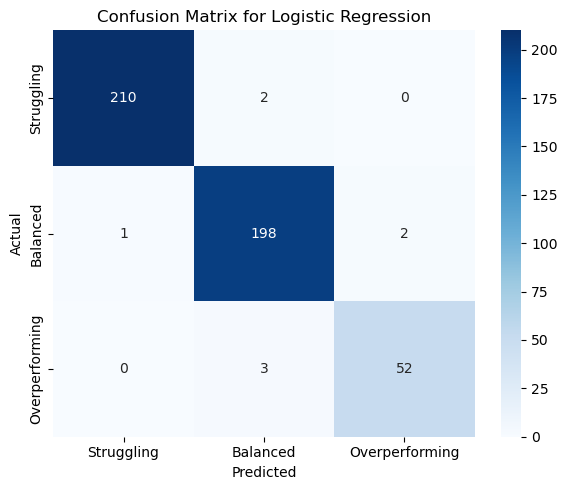

In [30]:
# =========================
# Confusion matrix plot – Logistic Regression
# =========================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Recompute CM (or reuse if you already have cm_lr)
labels = ["Struggling", "Balanced", "Overperforming"]
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.tight_layout()
plt.show()


In [31]:
# =========================
# 5-fold Cross-Validation – Logistic Regression
# =========================

from sklearn.model_selection import StratifiedKFold, cross_val_score

cv_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_acc_lr = cross_val_score(
    logreg_pipe,         # pipeline: scaler + logistic
    X_train_model,
    y_train,
    cv=cv_lr,
    scoring="accuracy"
)

cv_f1_lr = cross_val_score(
    logreg_pipe,
    X_train_model,
    y_train,
    cv=cv_lr,
    scoring="f1_macro"
)

print("=== 5-fold CV on TRAIN data (Logistic Regression) ===")
print("Accuracy scores:", cv_acc_lr)
print("Mean Accuracy:   ", cv_acc_lr.mean())
print("Macro F1 scores:", cv_f1_lr)
print("Mean Macro F1:   ", cv_f1_lr.mean())


=== 5-fold CV on TRAIN data (Logistic Regression) ===
Accuracy scores: [0.97247706 0.97706422 0.97706422 0.98623853 0.99082569]
Mean Accuracy:    0.9807339449541285
Macro F1 scores: [0.96434512 0.96779944 0.97120399 0.97877939 0.99290459]
Mean Macro F1:    0.9750065043403104


In [32]:
# Check performance on TRAIN set for comparison
y_pred_train_lr = logreg_pipe.predict(X_train_model)
print(classification_report(y_train, y_pred_train_lr, digits=3))


                precision    recall  f1-score   support

      Balanced      0.989     0.977     0.983       478
Overperforming      0.936     1.000     0.967       147
    Struggling      0.998     0.989     0.994       465

      accuracy                          0.985      1090
     macro avg      0.975     0.989     0.981      1090
  weighted avg      0.986     0.985     0.985      1090



In [33]:
# =========================
# STEP 5: Random Forest on KMeans groups
# =========================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# 5.1 Define the Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=5,
    max_features="sqrt",
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

# 5.2 Fit on TRAIN model features
rf_clf.fit(X_train_model, y_train)

# 5.3 Predict on TEST set
y_pred_rf = rf_clf.predict(X_test_model)

# 5.4 Evaluation numbers
print(" Random Forest ")
print(classification_report(
    y_test,
    y_pred_rf,
    digits=3
))

acc_rf = accuracy_score(y_test, y_pred_rf)
macro_f1_rf = f1_score(y_test, y_pred_rf, average="macro")

print(f"Accuracy: {acc_rf:.3f}")
print(f"Macro F1: {macro_f1_rf:.3f}")

 Random Forest 
                precision    recall  f1-score   support

      Balanced      0.951     0.960     0.955       201
Overperforming      0.926     0.909     0.917        55
    Struggling      0.981     0.976     0.979       212

      accuracy                          0.962       468
     macro avg      0.953     0.949     0.951       468
  weighted avg      0.962     0.962     0.962       468

Accuracy: 0.962
Macro F1: 0.951


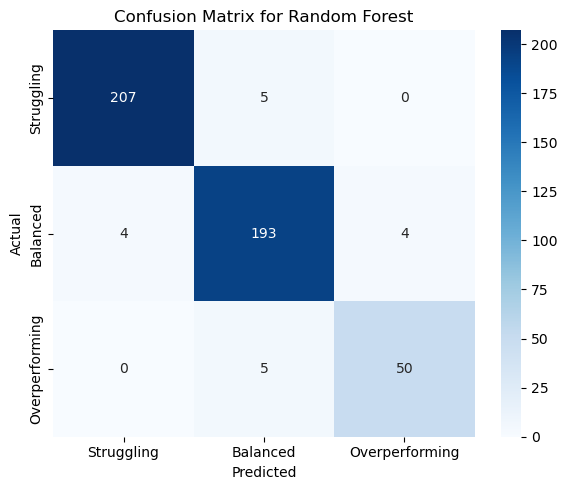

In [34]:
# 5.6 Plot confusion matrix like your earlier diagram
labels = ["Struggling", "Balanced", "Overperforming"]
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.tight_layout()
plt.show()


In [35]:
# 5.7 (Optional but useful) Train performance for overfitting check
y_pred_train_rf = rf_clf.predict(X_train_model)
print("\n Random Forest on TRAIN set ")
print(classification_report(y_train, y_pred_train_rf, digits=3))


 Random Forest on TRAIN set 
                precision    recall  f1-score   support

      Balanced      0.989     0.971     0.980       478
Overperforming      0.936     1.000     0.967       147
    Struggling      0.991     0.989     0.990       465

      accuracy                          0.983      1090
     macro avg      0.972     0.987     0.979      1090
  weighted avg      0.983     0.983     0.983      1090



In [36]:
# =========================
# 5-fold Cross-Validation – Random Forest
# =========================

from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy across folds
cv_acc = cross_val_score(
    rf_clf,
    X_train_model,
    y_train,
    cv=cv,
    scoring="accuracy"
)

# Macro F1 across folds
cv_f1 = cross_val_score(
    rf_clf,
    X_train_model,
    y_train,
    cv=cv,
    scoring="f1_macro"
)

print("=== 5-fold CV on TRAIN data (Random Forest) ===")
print("Accuracy scores:", cv_acc)
print("Mean Accuracy:   ", cv_acc.mean())
print("Macro F1 scores:", cv_f1)
print("Mean Macro F1:   ", cv_f1.mean())


=== 5-fold CV on TRAIN data (Random Forest) ===
Accuracy scores: [0.9587156  0.92201835 0.9266055  0.96330275 0.9587156 ]
Mean Accuracy:    0.9458715596330276
Macro F1 scores: [0.94446284 0.90665851 0.91190829 0.95714177 0.95711083]
Mean Macro F1:    0.9354564479824587


In [37]:
# =========================
# 5-fold Cross-Validation – Random Forest (optimised)
# =========================

from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "f1_macro": "f1_macro"
}

cv_results = cross_validate(
    rf_clf,             # your RandomForestClassifier
    X_train_model,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,          # use all cores for speed
    return_train_score=False
)

print("=== 5-fold CV on TRAIN data (Random Forest) ===")
print("Accuracy scores:", cv_results["test_acc"])
print("Mean Accuracy:   ", cv_results["test_acc"].mean())
print("Macro F1 scores:", cv_results["test_f1_macro"])
print("Mean Macro F1:   ", cv_results["test_f1_macro"].mean())


=== 5-fold CV on TRAIN data (Random Forest) ===
Accuracy scores: [0.9587156  0.92201835 0.9266055  0.96330275 0.9587156 ]
Mean Accuracy:    0.9458715596330276
Macro F1 scores: [0.94446284 0.90665851 0.91190829 0.95714177 0.95711083]
Mean Macro F1:    0.9354564479824587


In [38]:
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [acc_lr, acc_rf],
    "Macro F1": [macro_f1_lr, macro_f1_rf],
})


model_comparison = model_comparison.set_index("Model")
print(model_comparison)


                     Accuracy  Macro F1
Model                                  
Logistic Regression  0.982906  0.975745
Random Forest        0.961538  0.950533


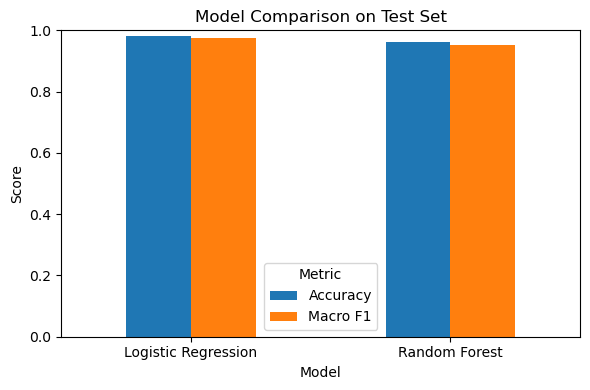

In [39]:
import matplotlib.pyplot as plt

# Assuming model_comparison has "Model" as index
ax = model_comparison.plot(
    kind="bar",
    figsize=(6, 4)
)

plt.ylim(0, 1)  # since accuracy/F1 are between 0 and 1
plt.ylabel("Score")
plt.title("Model Comparison on Test Set")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


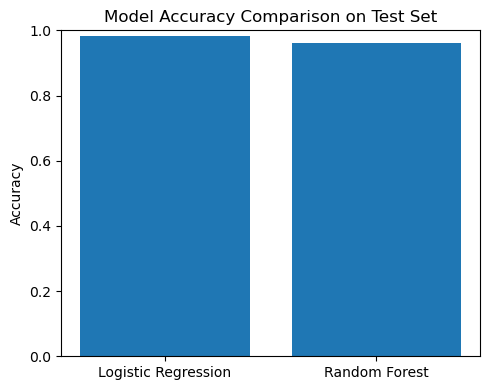

In [40]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Random Forest"]
accuracies = [acc_lr, acc_rf]  # from your earlier evaluation

plt.figure(figsize=(5, 4))
plt.bar(models, accuracies)

plt.ylim(0, 1)  # accuracies between 0 and 1
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison on Test Set")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [41]:
# =========================
# STEP 8: Dynamic Difficulty — final groups + recommendations (ALL players)
# =========================

import pandas as pd

# 8.0 Ensure we have a proper features frame for ALL rows
X_all_model = df_model[model_features].copy()   # <— THIS is what LR/RF need

# 8.1 Simple rule-based recommendation from group
def recommend(group: str) -> str:
    if group == "Struggling":
        return "Decrease Difficulty"
    if group == "Balanced":
        return "Keep Difficulty Same"
    return "Increase Difficulty"

# 8.2 Collect KMeans groups for ALL rows (train + test)
group_all_clusters = pd.Series(index=df_model.index, dtype=int)
group_all_clusters.loc[idx_train] = train_clusters
group_all_clusters.loc[idx_test]  = test_clusters
group_kmeans_all = group_all_clusters.map(cluster_to_group)

# 8.3 Supervised predictions for ALL rows (use FEATURES, not labels)
y_pred_lr_all = pd.Series(
    logreg_pipe.predict(X_all_model), index=df_model.index, name="Group_LR"
)
y_pred_rf_all = pd.Series(
    rf_clf.predict(X_all_model), index=df_model.index, name="Group_RF"
)

# 8.4 Majority vote helper
def majority_vote(row):
    # row contains 3 strings: Group_KMeans, Group_LR, Group_RF
    votes = [row["Group_KMeans"], row["Group_LR"], row["Group_RF"]]
    return pd.Series(votes).mode().iloc[0]  # robust mode; breaks ties deterministically

# 8.5 Build results (no raw features)
df_all_results = pd.DataFrame(index=df_model.index)
df_all_results["Group_KMeans"] = group_kmeans_all
df_all_results["Group_LR"]     = y_pred_lr_all
df_all_results["Group_RF"]     = y_pred_rf_all
df_all_results["Final_Group"]  = df_all_results.apply(majority_vote, axis=1)
df_all_results["Difficulty_Recommendation"] = df_all_results["Final_Group"].apply(recommend)

# 8.6 Player identifier: use an existing ID column if present; else use the index
# Set this to your actual column if you have one, e.g., "name" or "playerId"
possible_id_cols = ["name", "playerId", "player_id", "PlayerID", "Player_Id"]
id_col = next((c for c in possible_id_cols if c in df_model.columns), None)

if id_col is not None:
    df_all_results = df_all_results.rename_axis(None).reset_index(drop=True)
    df_final = df_all_results[[ "Final_Group", "Difficulty_Recommendation" ]].copy()
    df_final.insert(0, "Player_ID", df_model[id_col].values)
else:
    # Fall back to index as the identifier
    df_final = df_all_results[[ "Final_Group", "Difficulty_Recommendation" ]].copy()
    df_final.index.name = "Player_Index"
    df_final = df_final.reset_index()

# 8.7 Preview + summary
print(df_final.head())

print("\nCounts of difficulty recommendations (ALL players):")
print(df_final["Difficulty_Recommendation"].value_counts())

# 8.8 Save CSV with exactly the columns you want
out_csv = "all_players_difficulty_recommendations.csv"
df_final.to_csv(out_csv, index=False)
print(f"\nSaved {out_csv}")


                Player_ID Final_Group Difficulty_Recommendation
0         RggRt45#4697369  Struggling       Decrease Difficulty
1      JohniceRex#9176033  Struggling       Decrease Difficulty
2  bootybootykill#1892064  Struggling       Decrease Difficulty
3           JNaCo#5244172  Struggling       Decrease Difficulty
4   gomezyayo_007#6596687  Struggling       Decrease Difficulty

Counts of difficulty recommendations (ALL players):
Difficulty_Recommendation
Keep Difficulty Same    676
Decrease Difficulty     674
Increase Difficulty     208
Name: count, dtype: int64

Saved all_players_difficulty_recommendations.csv


In [42]:
# Export trained artifacts for Streamlit app
from pathlib import Path
import joblib

artifacts = {
    "cluster_features": cluster_features,
    "model_features": model_features,
    "cluster_to_group": cluster_to_group,
    "scaler_cluster": scaler_cluster,
    "kmeans": kmeans,
    "logreg_pipe": logreg_pipe,
    "rf_clf": rf_clf,
}

out_dir = Path("artifacts")
out_dir.mkdir(exist_ok=True)
artifact_path = out_dir / "model_artifacts.joblib"
joblib.dump(artifacts, artifact_path)
print(f"Saved artifacts to {artifact_path}")


Saved artifacts to artifacts\model_artifacts.joblib
